In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [33]:
#importando os arquivos
trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_location_name = pd.read_csv('/datasets/project_sql_result_04.csv')

In [34]:
#Estudando seu conteúdo - trips_amount
print(trips_amount.info())
print(trips_amount.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [35]:
#Estudando seu conteúdo - dropoff_location_name
print(dropoff_location_name.info())
print(dropoff_location_name.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


Depois de analisados, os tipos de dados se mostraram coerentes com a natureza das colunas assim como a quantidade de valores não nulos

In [36]:
#10 principais bairros em termos de destinos
top_10_bairros = dropoff_location_name.sort_values(by='average_trips', ascending=False).head(10)

print(top_10_bairros)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


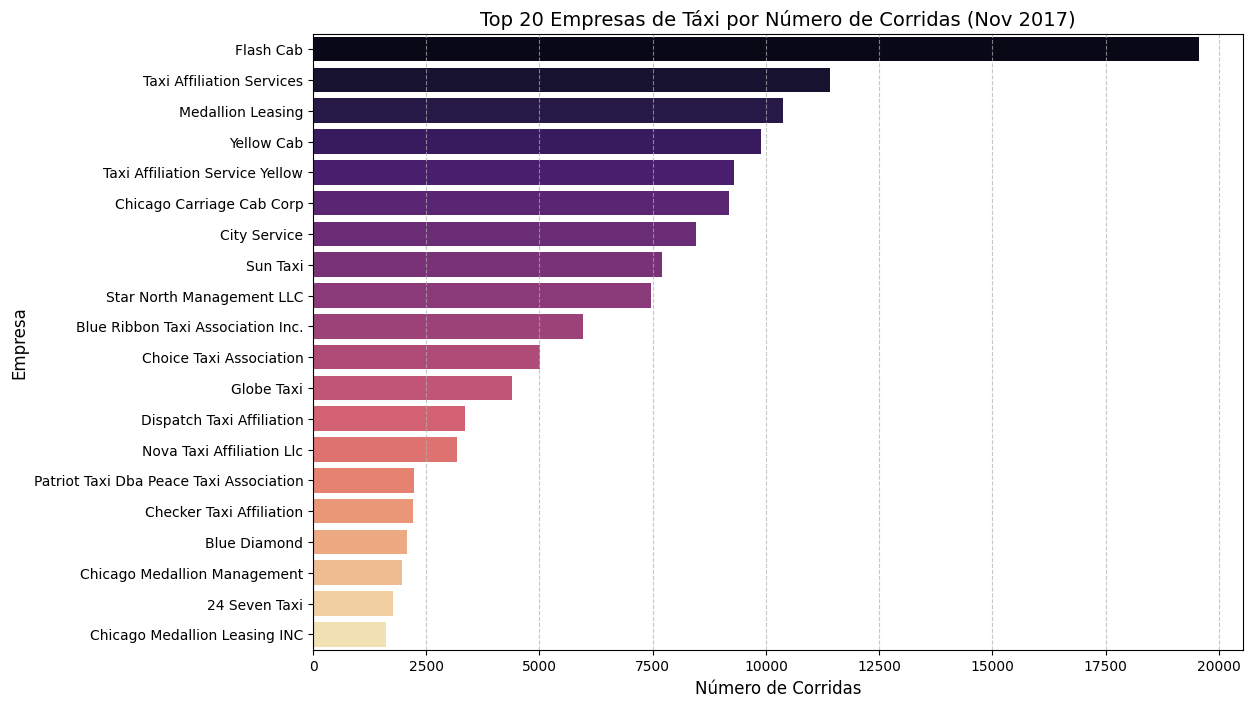

In [37]:
#Gráfico: Empresas de Táxi e Número de Corridas
plt.figure(figsize=(12, 8))
top_companies = trips_amount.sort_values(by='trips_amount', ascending=False).head(20)
sns.barplot(data=top_companies, x='trips_amount', y='company_name', palette='magma')
plt.title('Top 20 Empresas de Táxi por Número de Corridas (Nov 2017)', fontsize=14)
plt.xlabel('Número de Corridas', fontsize=12)
plt.ylabel('Empresa', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

**Conclusão: Empresas de Táxi vs. Número de Corridas**

O gráfico revela uma estrutura de mercado oligopolista com uma liderança hegemônica da Flash Cab, cujo volume de corridas é drasticamente superior ao de todos os concorrentes, seguida pela Taxi Affiliation Services que mantém uma posição sólida, porém distante do primeiro lugar. Essa distribuição de cauda longa, onde dezenas de empresas menores diluem o restante do mercado, indica que a capilaridade da frota e o reconhecimento da marca são os fatores críticos de sucesso em Chicago, sugerindo que para um novo entrante (como a Zuber) competir frontalmente com a Flash Cab exigiria um investimento massivo em frota, sendo talvez mais estratégico focar em nichos ou horários onde a líder não consegue suprir a demanda total.

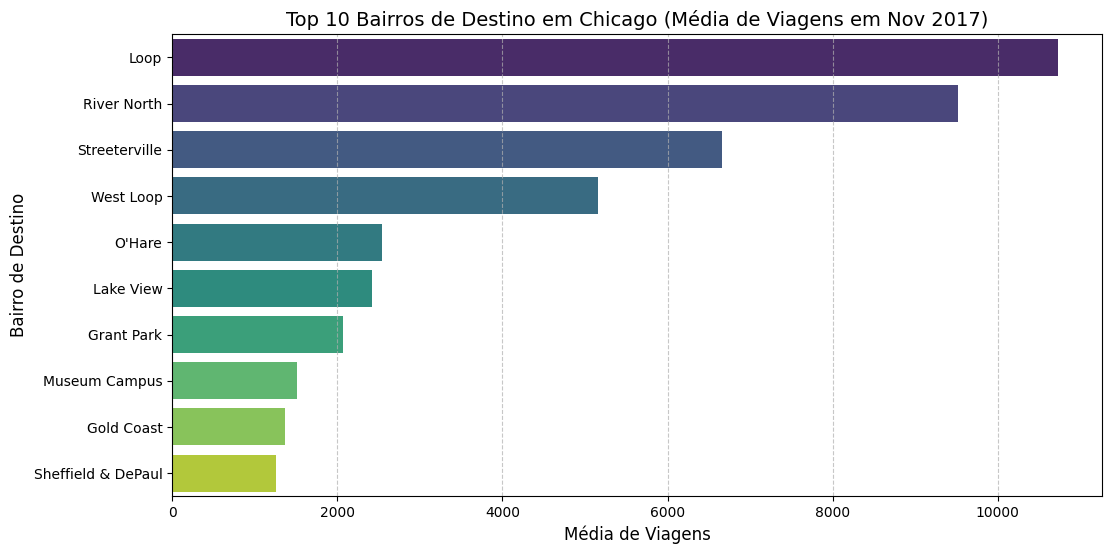

In [38]:
#Gráfico: Top 10 Bairros de Destino
plt.figure(figsize=(12, 6))
top_10_neighborhoods = dropoff_location_name.sort_values(by='average_trips', ascending=False).head(10)
sns.barplot(data=top_10_neighborhoods, x='average_trips', y='dropoff_location_name', palette='viridis')
plt.title('Top 10 Bairros de Destino em Chicago (Média de Viagens em Nov 2017)', fontsize=14)
plt.xlabel('Média de Viagens', fontsize=12)
plt.ylabel('Bairro de Destino', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

**Conclusão: Top 10 Bairros de Destino**

A análise espacial dos destinos demonstra que a demanda por táxis em Chicago é extremamente centralizada, orbitando quase exclusivamente em torno do Loop (o centro financeiro e comercial) e seus bairros adjacentes de alta densidade turística e residencial, como River North e Streeterville. A presença significativa do Aeroporto Internacional O'Hare neste ranking reforça a hipótese de que o serviço é utilizado primariamente para fins utilitários de alto valor — deslocamento para o trabalho no centro e viagens aéreas — em vez de lazer disperso pelos subúrbios; portanto, qualquer estratégia de alocação de motoristas deve priorizar a disponibilidade nessas zonas de "calor" econômico para maximizar a eficiência e reduzir o tempo ocioso.

**Testando a hipótese "A duração média das viagens do Loop para o Aeroporto Internacional O'Hare em sábados chuvosos é igual à duração média das viagens em sábados com clima bom"**

In [39]:
df_last = pd.read_csv('/datasets/project_sql_result_07.csv')


rides_rainy = df_last[df_last['weather_conditions'] == 'Bad']['duration_seconds']
rides_good = df_last[df_last['weather_conditions'] == 'Good']['duration_seconds']


alpha = 0.05  


print(f"Média Duração (Bad/Rainy): {rides_rainy.mean():.2f} segundos")
print(f"Média Duração (Good): {rides_good.mean():.2f} segundos")
print("-" * 30)


levene_test = st.levene(rides_rainy, rides_good)
if levene_test.pvalue < alpha:
    print("As variâncias são diferentes (Levene p < alpha). Usaremos equal_var=False.")
    equal_var_param = False
else:
    print("As variâncias são iguais (Levene p >= alpha). Usaremos equal_var=True.")
    equal_var_param = True


results = st.ttest_ind(rides_rainy, rides_good, equal_var=equal_var_param)

print("-" * 30)
print(f"P-valor: {results.pvalue}")


if results.pvalue < alpha:
    print("REJEITAMOS a hipótese nula.")
    print("Conclusão: Há evidência estatística suficiente para afirmar que a duração média das viagens muda nos sábados chuvosos.")
else:
    print("NÃO REJEITAMOS a hipótese nula.")
    print("Conclusão: Não há evidência estatística suficiente para dizer que a duração muda. A diferença pode ser aleatória.")

Média Duração (Bad/Rainy): 2427.21 segundos
Média Duração (Good): 1999.68 segundos
------------------------------
As variâncias são iguais (Levene p >= alpha). Usaremos equal_var=True.
------------------------------
P-valor: 6.517970327099473e-12
REJEITAMOS a hipótese nula.
Conclusão: Há evidência estatística suficiente para afirmar que a duração média das viagens muda nos sábados chuvosos.


**Nível de Significância (Alfa):** 

Escolhi 0.05 (5%). Este é o valor convencional em análises de negócios e ciências sociais. Significa que exigimos um nível de confiança de 95% antes de declarar que o clima realmente impacta o trânsito, evitando "falsos positivos" causados por variações aleatórias do dia a dia.

**Teste de Variância (Levene):** 

Adicionei uma etapa para verificar se a dispersão dos dados (variância) é igual nos dois grupos. Chuvas costumam criar caos imprevisível (alta variância), enquanto dias de sol são mais constantes. Se as variâncias forem diferentes, usamos a variação de Welch do teste T (equal_var=False), que é mais robusta e correta cientificamente.